<a href="https://colab.research.google.com/github/evicsouza/AdoPet/blob/master/Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datapackage
!pip install pandas
!pip install tensorflow==1.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import glob
import pandas as pd
from google.colab import files

uploaded = files.upload()

extensao = 'csv'
arquivos_csv = [i for i in glob.glob('*.{}'.format(extensao))]
concatenado = pd.concat([pd.read_csv(f, sep=';') for f in arquivos_csv ])

Saving diabetes.csv to diabetes.csv


Leitura da base de dados e alteração da coluna com string para boolean

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


,preg,plas,pres,skin,insu,mass,pedi,age,classDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


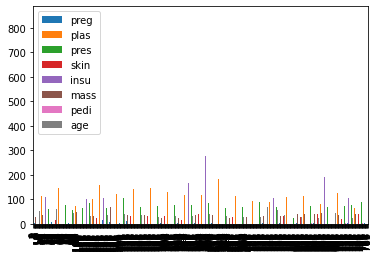

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataFrame = pd.read_csv('diabetes.csv')
display(dataFrame)
dataFrame.plot(kind = 'bar')
dataFrame_colString = dataFrame.select_dtypes(include = object)
dataFrame_colString.head() 
dataFrame['class'] = np.where(dataFrame['class'].eq('tested_positive'), 1, 0)
len(dataFrame)
dataFrame.ndim
dataFrame.size
dataFrame.rename(columns={'class': 'classDiabetes'}, inplace = True)
display(dataFrame)



Normalização de dados.

In [3]:
df_max_scaled = dataFrame.copy()
for column in df_max_scaled.columns[0:7]:
  df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()

display(df_max_scaled)

,preg,plas,pres,skin,insu,mass,pedi,age,classDiabetes
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,33,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,63,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,27,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,30,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,47,1


In [4]:
learning_rate = 0.01
training_epochs = 30
display_steps = 100

n_input = 4
n_hidden = 2
n_output = 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   preg           768 non-null    int64  
 1   plas           768 non-null    int64  
 2   pres           768 non-null    int64  
 3   skin           768 non-null    int64  
 4   insu           768 non-null    int64  
 5   mass           768 non-null    float64
 6   pedi           768 non-null    float64
 7   age            768 non-null    int64  
 8   classDiabetes  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


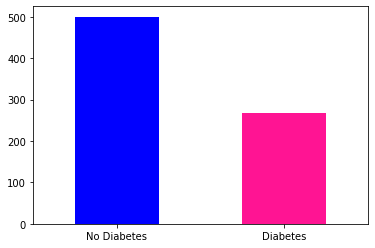

In [5]:
dataFrame["classDiabetes"].value_counts().plot(kind="bar",color=["blue","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);
dataFrame.info()

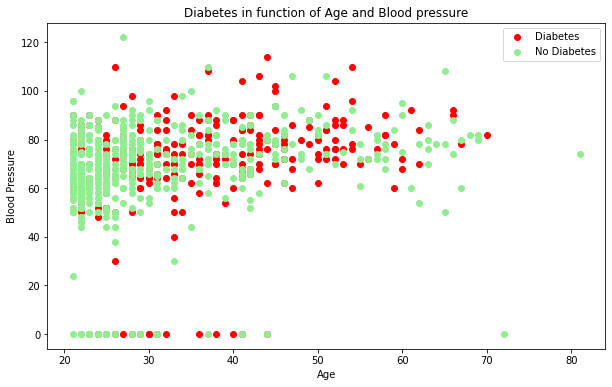

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(dataFrame.age[dataFrame.classDiabetes==1],dataFrame.pres[dataFrame.classDiabetes==1],c="Red");

plt.scatter(dataFrame.age[dataFrame.classDiabetes==0],dataFrame.pres[dataFrame.classDiabetes==0],c="lightgreen");

plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

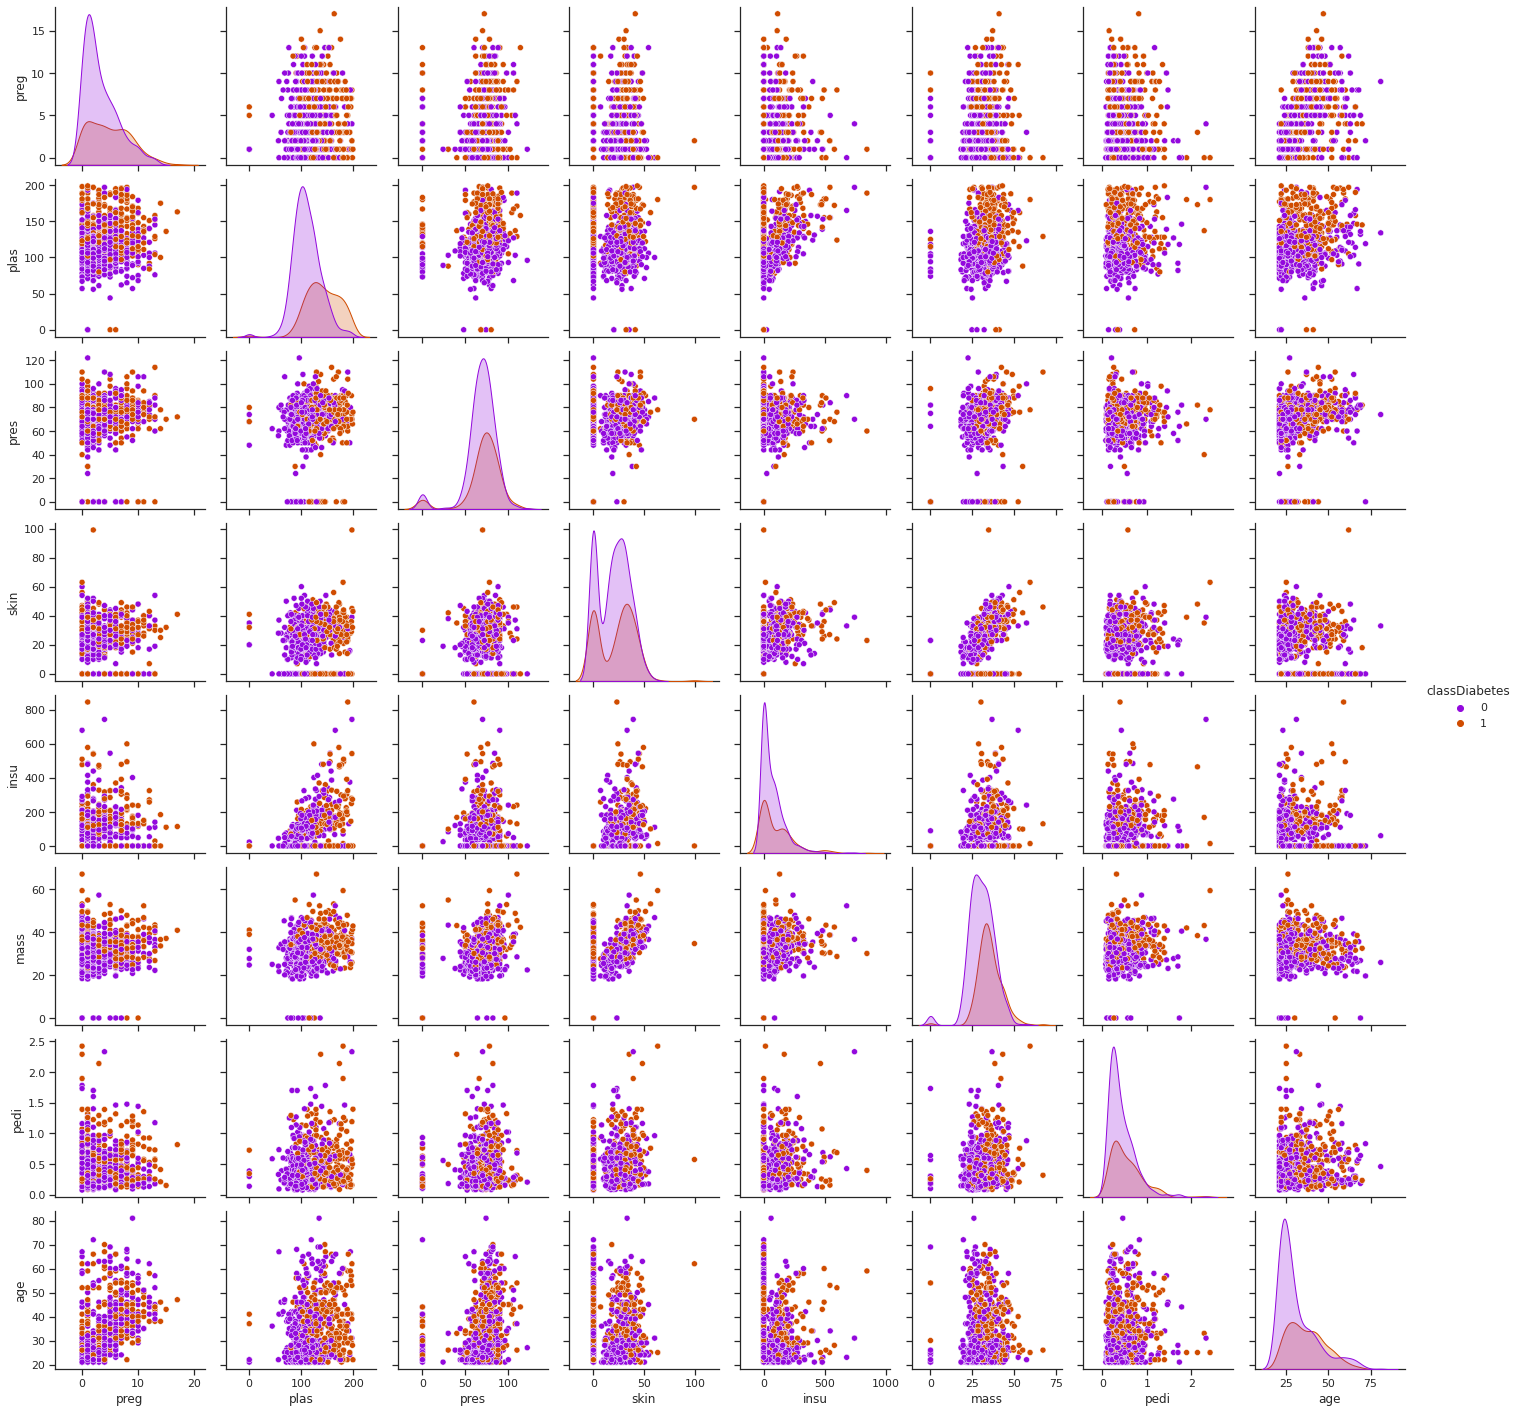

In [7]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataFrame,hue='classDiabetes',palette='gnuplot');

In [8]:
from sklearn.model_selection import train_test_split

dataFrame.sample(frac=1)

X = dataFrame.drop("classDiabetes",axis=1)
y = dataFrame["classDiabetes"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25)
(len(X_train),len(X_test))


(576, 192)

Métrica Regressão Lógica

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
log_reg = log_reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [10]:
## KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
knn = knn.score(X_test,y_test)

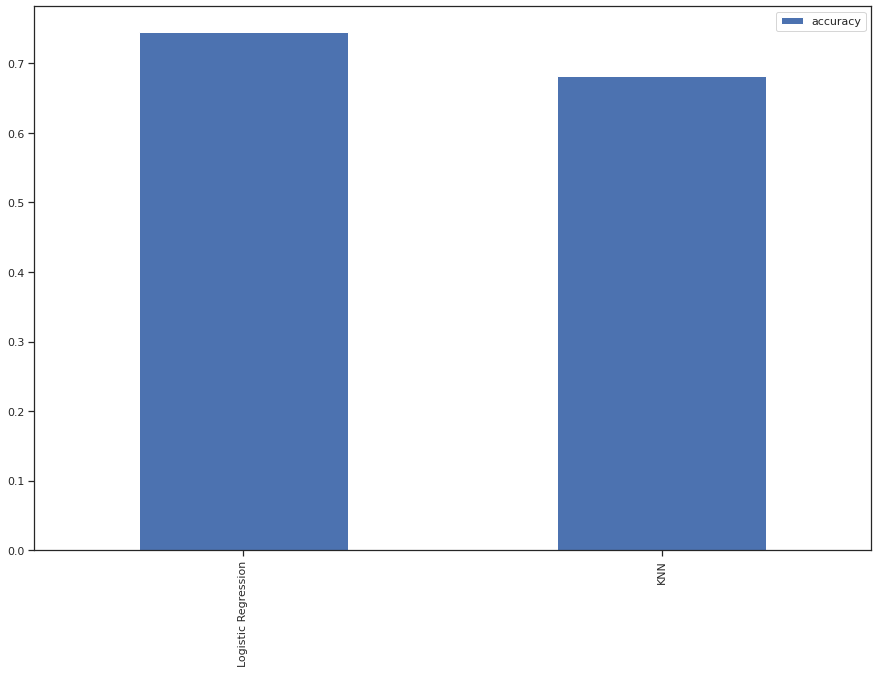

In [11]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,"KNN":knn}, index=["accuracy"])
model_compare
model_compare.T.plot.bar(figsize=(15,10));


In [12]:
from sklearn.model_selection import RandomizedSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid, cv=5, n_iter=20,verbose=True)

rs_log_reg.fit(X_train, y_train)
score = rs_log_reg.score(X_test,y_test)
score

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.7395833333333334

In [13]:
from sklearn.model_selection import GridSearchCV
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gs_log_reg.fit(X_train,y_train)
gs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.7395833333333334

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


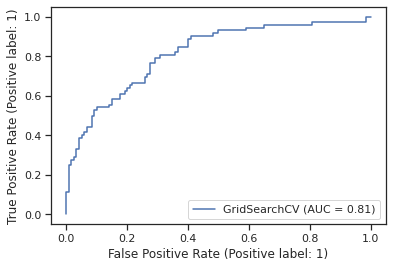

In [14]:
from sklearn.metrics import plot_roc_curve
y_preds = gs_log_reg.predict(X_test)
y_preds
np.array(y_test)
plot_roc_curve(gs_log_reg,X_test,y_test)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model


def redeUm():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(3, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.25, name='Dropout1')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    modelUm = Model(inputs=inputs, outputs=layer)
    return modelUm

modelUm = redeUm()
modelUm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 3)                 27        
                                                                 
 BC1 (BatchNormalization)    (None, 3)                 12        
                                                                 
 Activation1 (Activation)    (None, 3)                 0         
                                                                 
 Dropout1 (Dropout)          (None, 3)                 0         
                                                                 
 OutLayer (Dense)            (None, 1)                 4         
                                                                 
 sigmoid (Activation)        (None, 1)                 0     

In [16]:
def redeDois():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(5, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.25, name='Dropout1')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    modelDois = Model(inputs=inputs, outputs=layer)
    return modelDois


modelDois = redeDois()
modelDois.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 5)                 45        
                                                                 
 BC1 (BatchNormalization)    (None, 5)                 20        
                                                                 
 Activation1 (Activation)    (None, 5)                 0         
                                                                 
 Dropout1 (Dropout)          (None, 5)                 0         
                                                                 
 OutLayer (Dense)            (None, 1)                 6         
                                                                 
 sigmoid (Activation)        (None, 1)                 0   

In [17]:
def redeTres():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(7, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.25, name='Dropout1')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    modelTres = Model(inputs=inputs, outputs=layer)
    return modelTres


modelTres = redeTres()
modelTres.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 7)                 63        
                                                                 
 BC1 (BatchNormalization)    (None, 7)                 28        
                                                                 
 Activation1 (Activation)    (None, 7)                 0         
                                                                 
 Dropout1 (Dropout)          (None, 7)                 0         
                                                                 
 OutLayer (Dense)            (None, 1)                 8         
                                                                 
 sigmoid (Activation)        (None, 1)                 0   

{'loss': [0.8459364771842957, 0.8189265131950378, 0.8110458254814148, 0.785384476184845, 0.7829274535179138, 0.7503626942634583, 0.7529236674308777, 0.7176323533058167, 0.711094856262207, 0.7145847082138062, 0.6845963597297668, 0.6854243278503418, 0.6583080291748047, 0.6605335474014282, 0.6574187278747559, 0.6408714652061462, 0.6319702863693237, 0.6205062866210938, 0.6217336654663086, 0.6010288596153259, 0.6002494692802429, 0.6037802696228027, 0.5960190892219543, 0.5909372568130493, 0.5860582590103149, 0.5830845236778259, 0.5788698196411133, 0.5710105895996094, 0.5692270994186401, 0.579944372177124, 0.5673539042472839, 0.5413506627082825, 0.5412027835845947, 0.5616702437400818, 0.5541269779205322, 0.552645742893219, 0.5442652702331543, 0.5489546656608582, 0.5542193055152893, 0.5603821277618408, 0.5490731596946716, 0.5416765213012695, 0.533798098564148, 0.5301925539970398, 0.5379270315170288, 0.5477294921875, 0.5256674885749817, 0.5529334545135498, 0.5325844287872314, 0.5475204586982727

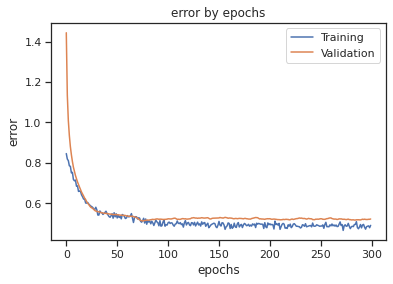

In [19]:
from tensorflow.keras.optimizers import Adam

modelUm.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
h = modelUm.fit(x = X_train, y = y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[], verbose=0)

erro_medio_quadrado = []

print(h.history)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('error by epochs')
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend(['Training', 'Validation'])

{'loss': [0.7306220531463623, 0.7538377642631531, 0.7099235653877258, 0.6922158598899841, 0.7081944942474365, 0.652933657169342, 0.6534097194671631, 0.6699560880661011, 0.6464502811431885, 0.6492325067520142, 0.6315762996673584, 0.6229692697525024, 0.6174828410148621, 0.604998767375946, 0.5975565314292908, 0.585408627986908, 0.5738661289215088, 0.562582790851593, 0.5614166259765625, 0.5606905817985535, 0.5756587386131287, 0.5801513195037842, 0.5495090484619141, 0.5384888052940369, 0.5344088673591614, 0.5328848361968994, 0.5386483669281006, 0.5337855219841003, 0.5453523397445679, 0.5133434534072876, 0.5275766849517822, 0.5284799337387085, 0.5270015597343445, 0.5175027847290039, 0.5136337876319885, 0.5333268642425537, 0.5198027491569519, 0.5220257639884949, 0.5187883973121643, 0.5022941827774048, 0.5057651996612549, 0.5134555101394653, 0.5062065124511719, 0.5078256130218506, 0.4921700656414032, 0.48286280035972595, 0.4969838857650757, 0.5247251987457275, 0.5127661228179932, 0.50771111249

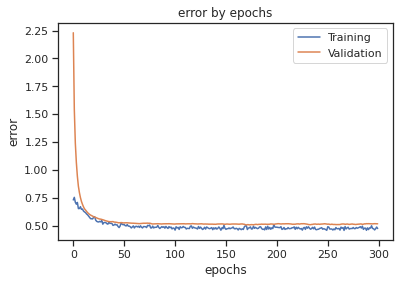

In [20]:
from tensorflow.keras.optimizers import Adam

modelDois.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
h = modelDois.fit(x = X_train, y = y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[], verbose=0)

erro_medio_quadrado = []

print(h.history)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('error by epochs')
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend(['Training', 'Validation'])

{'loss': [0.9475995302200317, 0.8757498264312744, 0.8588995933532715, 0.8290428519248962, 0.7931321263313293, 0.7745649814605713, 0.7359631657600403, 0.7576320171356201, 0.7312861084938049, 0.6968981027603149, 0.6939622759819031, 0.6820400953292847, 0.6649003028869629, 0.6491857767105103, 0.6428632736206055, 0.6247823238372803, 0.6212632656097412, 0.611901044845581, 0.6066017746925354, 0.6015799045562744, 0.5985352993011475, 0.5785987377166748, 0.5814353227615356, 0.5902694463729858, 0.5756161212921143, 0.5778103470802307, 0.5652689337730408, 0.559266209602356, 0.5570275783538818, 0.5348747968673706, 0.564765214920044, 0.5432880520820618, 0.5527130365371704, 0.5523890852928162, 0.5375695824623108, 0.5537297129631042, 0.5254269242286682, 0.5355879664421082, 0.5283656716346741, 0.5305252075195312, 0.5403635501861572, 0.5288869738578796, 0.537697434425354, 0.5198754072189331, 0.5442380905151367, 0.5343404412269592, 0.509807825088501, 0.5410911440849304, 0.5195303559303284, 0.5099195837974

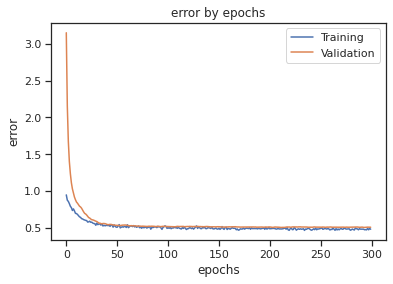

In [21]:
from tensorflow.keras.optimizers import Adam

modelTres.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
h = modelTres.fit(x = X_train, y = y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[], verbose=0)

erro_medio_quadrado = []

print(h.history)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('error by epochs')
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend(['Training', 'Validation'])

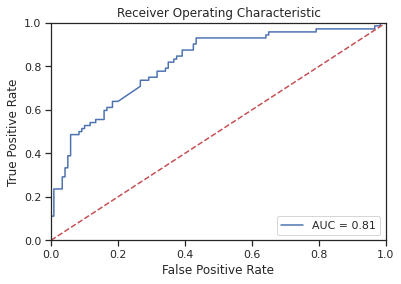

In [32]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

probs = modelUm.predict_on_batch(X_test)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

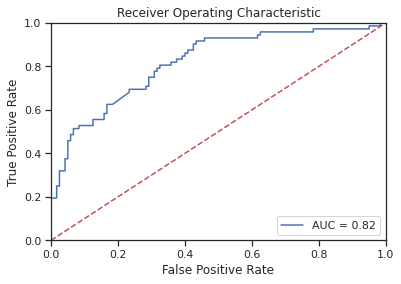

In [33]:
probs = modelDois.predict_on_batch(X_test)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

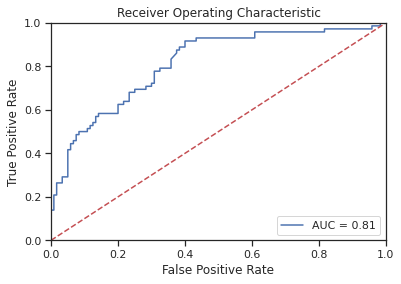

In [34]:
probs = modelTres.predict_on_batch(X_test)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

       False       0.78      0.87      0.82       123
        True       0.71      0.57      0.63        69

    accuracy                           0.76       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.76      0.75       192



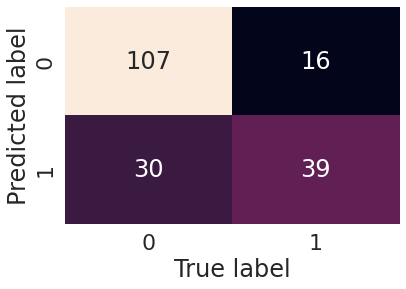

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

sns.set(font_scale=2)
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label")

print(classification_report(y_test, y_preds))



In [ ]:
from sklearn.model_selection import cross_val_score
gs_log_reg.best_params_
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")
cv_acc = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc


0.75

In [ ]:
cv_precision = cross_val_score(clf, X, y,cv=10, scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7142036215119739

In [ ]:
cv_recall = cross_val_score(clf, X, y, cv=10, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.48091168091168085

In [ ]:
cv_f1 = cross_val_score(clf, X, y, cv=10, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.569372018074834

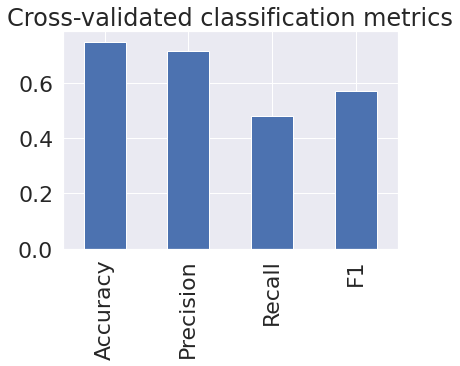

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_precision, "Recall": cv_recall, "F1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [ ]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

clf.fit(X_train, y_train);
clf.coef_

feature_dict = dict(zip(dataFrame.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.005107110634677071,
 'insu': 6.668666405158198e-05,
 'mass': 0.022302675715509507,
 'pedi': 0.24107618276549694,
 'plas': 0.02185873797746304,
 'preg': 0.11444846549794814,
 'pres': -0.023595181857656643,
 'skin': -0.0008715547302358215}

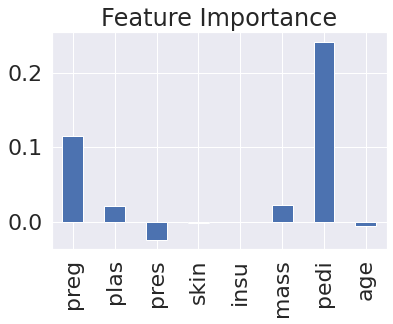

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
import pickle

pickle.dump(gs_log_reg, open("Diabetes.pkl", "wb"))
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.7604166666666666

In [ ]:
X_test.head(1)


,preg,plas,pres,skin,insu,mass,pedi,age
138,0,129,80,0,0,31.2,0.703,29


In [ ]:
preg = input()
plas = input()
press = input()
skin = input()
insu = input()
mass = input()
pedi = input()
age = input()

45
20
30
2
123
58
33
19


In [ ]:
row_df = pd.DataFrame([pd.Series([preg,plas,press,skin,insu,mass,pedi,age])])
row_df


,0,1,2,3,4,5,6,7
0,45,20,30,2,123,58,33,19


In [ ]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 0.9999999999999831


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
loaded_model.predict(row_df)[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


True